In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV
#from sklearn.feature_selection import VarianceThreshold
#from sklearn.feature_selection import SelectKBest, chi2
#from sklearn import preprocessing
from sklearn import cluster

#need further understanding for use of clustering after implementation

### Load data

In [3]:
non_ref_data = pd.read_csv("data/training/training_metrics.csv")
non_ref_data.head()

,id,image,brisque,pydom_sharpness
0,0,21_training.tif,23.458350,0.997578
1,1,22_training.tif,22.814265,0.977693
2,2,23_training.tif,35.083308,0.941345
3,3,24_training.tif,27.205010,0.971248
4,4,25_training.tif,26.566858,0.982261


In [4]:
ref_data = pd.read_csv("data/training/training_37_ref_metrics.csv")
ref_data.head()

,id,image,mse,rmse,psnr,ssim,uqi,msssim,adapted_rand_error
0,0,21_training.tif,1176.725017,34.303426,17.424054,"(0.655206468192055, 0.6740080810127406)",0.913959,(0.7018449003550742+0j),"(0.8030982661311423, 0.19286383534032436, 0.20..."
1,1,22_training.tif,1062.279190,32.592625,17.868417,"(0.6501078063903436, 0.6652680587471161)",0.911037,(0.7253225811278972+0j),"(0.8071593906127517, 0.19070530060966778, 0.19..."
2,2,23_training.tif,2905.672550,53.904291,13.498337,"(0.6329314785024034, 0.6671300054780337)",0.862389,(0.6289874800420618+0j),"(0.8902304258462661, 0.1754649959176887, 0.079..."
3,3,24_training.tif,1760.325071,41.956228,15.674875,"(0.6960933929211962, 0.7201422628277122)",0.920043,(0.7329575822418705+0j),"(0.8309853036207704, 0.19875821446580455, 0.14..."
4,4,25_training.tif,382.593116,19.559988,22.303432,"(0.6922166777303226, 0.7037054711513765)",0.936117,(0.7596412539601146+0j),"(0.8045539264474649, 0.19991819591260052, 0.19..."


In [5]:
non_ref_data

,id,image,brisque,pydom_sharpness
0,0,21_training.tif,23.458350,0.997578
1,1,22_training.tif,22.814265,0.977693
2,2,23_training.tif,35.083308,0.941345
3,3,24_training.tif,27.205010,0.971248
4,4,25_training.tif,26.566858,0.982261
5,5,26_training.tif,30.239351,0.982997
6,6,27_training.tif,17.814841,1.004942
7,7,28_training.tif,16.855269,1.008027
8,8,29_training.tif,28.162767,0.960950
9,9,30_training.tif,29.334717,0.959960


In [6]:
ref_data

,id,image,mse,rmse,psnr,ssim,uqi,msssim,adapted_rand_error
0,0,21_training.tif,1176.725017,34.303426,17.424054,"(0.655206468192055, 0.6740080810127406)",0.913959,(0.7018449003550742+0j),"(0.8030982661311423, 0.19286383534032436, 0.20..."
1,1,22_training.tif,1062.279190,32.592625,17.868417,"(0.6501078063903436, 0.6652680587471161)",0.911037,(0.7253225811278972+0j),"(0.8071593906127517, 0.19070530060966778, 0.19..."
2,2,23_training.tif,2905.672550,53.904291,13.498337,"(0.6329314785024034, 0.6671300054780337)",0.862389,(0.6289874800420618+0j),"(0.8902304258462661, 0.1754649959176887, 0.079..."
3,3,24_training.tif,1760.325071,41.956228,15.674875,"(0.6960933929211962, 0.7201422628277122)",0.920043,(0.7329575822418705+0j),"(0.8309853036207704, 0.19875821446580455, 0.14..."
4,4,25_training.tif,382.593116,19.559988,22.303432,"(0.6922166777303226, 0.7037054711513765)",0.936117,(0.7596412539601146+0j),"(0.8045539264474649, 0.19991819591260052, 0.19..."
5,5,26_training.tif,964.761638,31.060612,18.286603,"(0.6407901848892202, 0.6846427493810446)",0.840873,(0.7059180984343262+0j),"(0.8028198052265249, 0.20914488564088504, 0.18..."
6,6,27_training.tif,1161.422151,34.079644,17.480903,"(0.7119457367517451, 0.7276618491878928)",0.943704,(0.7884512583061599+0j),"(0.8057519576136937, 0.19570161961425017, 0.19..."
7,7,28_training.tif,570.166425,23.878158,20.570787,"(0.6361472717872108, 0.6459395423774681)",0.916986,(0.7191450371235248+0j),"(0.8117121923328866, 0.1862926894043367, 0.190..."
8,8,29_training.tif,457.771036,21.395584,21.524321,"(0.6772781847708079, 0.6953545708913582)",0.916118,(0.7606998738599856+0j),"(0.7970861645444424, 0.20326101121492632, 0.20..."
9,9,30_training.tif,959.966344,30.983324,18.308244,"(0.6557187121422979, 0.7062409144780387)",0.829121,(0.7488097398175927+0j),"(0.7995494774573885, 0.21125900714570942, 0.19..."


### Data Visualisation

In [7]:
brisque = non_ref_data['brisque'].tolist()
brisque

[23.45834982589233,
 22.814265146955194,
 35.08330797623805,
 27.2050103084799,
 26.566857635104927,
 30.239351146827715,
 17.814840811715246,
 16.855269307188312,
 28.16276691388836,
 29.334717130723877,
 30.477765479503518,
 25.30289822476843,
 20.08663191505886,
 25.959460025672318,
 20.278240350318328,
 21.584048755467702,
 14.937576841790786,
 22.500557909823755,
 28.228214094856163,
 24.994000898689904]

In [8]:
sharpness = non_ref_data['pydom_sharpness'].tolist()
sharpness

[0.9975776186103391,
 0.9776932006047236,
 0.9413453687962602,
 0.9712479544415128,
 0.9822610924719952,
 0.982997277561926,
 1.0049418224152544,
 1.00802705365208,
 0.9609504511680709,
 0.9599600854438506,
 0.9488234845417188,
 0.9834667035951308,
 1.0050248039913146,
 0.9299810413467616,
 1.0103703665511652,
 0.9905164214007732,
 1.011065671700877,
 0.9824332085094948,
 0.9843138792543056,
 0.985734869571014]

In [9]:
images = non_ref_data['image'].tolist()
images

['21_training.tif',
 '22_training.tif',
 '23_training.tif',
 '24_training.tif',
 '25_training.tif',
 '26_training.tif',
 '27_training.tif',
 '28_training.tif',
 '29_training.tif',
 '30_training.tif',
 '31_training.tif',
 '32_training.tif',
 '33_training.tif',
 '34_training.tif',
 '35_training.tif',
 '36_training.tif',
 '37_training.tif',
 '38_training.tif',
 '39_training.tif',
 '40_training.tif']

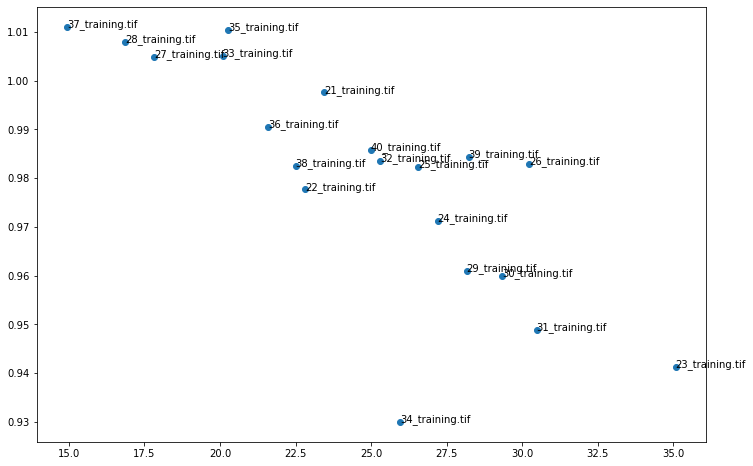

In [21]:
fig, ax = plt.subplots()
ax.scatter(brisque, sharpness)
fig.set_size_inches(12, 8)

for i, txt in enumerate(images):
    ax.annotate(txt, (brisque[i], sharpness[i]))

### Data Preprocessing

In [6]:
data = ref_data
data['brisque'] = non_ref_data['brisque']
data['pydom_sharpness'] = non_ref_data['pydom_sharpness']

In [7]:
data

,id,image,mse,rmse,psnr,ssim,uqi,msssim,adapted_rand_error,brisque,pydom_sharpness
0,0,21_training.tif,1176.725017,34.303426,17.424054,"(0.655206468192055, 0.6740080810127406)",0.913959,(0.7018449003550742+0j),"(0.8030982661311423, 0.19286383534032436, 0.20...",23.458350,0.997578
1,1,22_training.tif,1062.279190,32.592625,17.868417,"(0.6501078063903436, 0.6652680587471161)",0.911037,(0.7253225811278972+0j),"(0.8071593906127517, 0.19070530060966778, 0.19...",22.814265,0.977693
2,2,23_training.tif,2905.672550,53.904291,13.498337,"(0.6329314785024034, 0.6671300054780337)",0.862389,(0.6289874800420618+0j),"(0.8902304258462661, 0.1754649959176887, 0.079...",35.083308,0.941345
3,3,24_training.tif,1760.325071,41.956228,15.674875,"(0.6960933929211962, 0.7201422628277122)",0.920043,(0.7329575822418705+0j),"(0.8309853036207704, 0.19875821446580455, 0.14...",27.205010,0.971248
4,4,25_training.tif,382.593116,19.559988,22.303432,"(0.6922166777303226, 0.7037054711513765)",0.936117,(0.7596412539601146+0j),"(0.8045539264474649, 0.19991819591260052, 0.19...",26.566858,0.982261
5,5,26_training.tif,964.761638,31.060612,18.286603,"(0.6407901848892202, 0.6846427493810446)",0.840873,(0.7059180984343262+0j),"(0.8028198052265249, 0.20914488564088504, 0.18...",30.239351,0.982997
6,6,27_training.tif,1161.422151,34.079644,17.480903,"(0.7119457367517451, 0.7276618491878928)",0.943704,(0.7884512583061599+0j),"(0.8057519576136937, 0.19570161961425017, 0.19...",17.814841,1.004942
7,7,28_training.tif,570.166425,23.878158,20.570787,"(0.6361472717872108, 0.6459395423774681)",0.916986,(0.7191450371235248+0j),"(0.8117121923328866, 0.1862926894043367, 0.190...",16.855269,1.008027
8,8,29_training.tif,457.771036,21.395584,21.524321,"(0.6772781847708079, 0.6953545708913582)",0.916118,(0.7606998738599856+0j),"(0.7970861645444424, 0.20326101121492632, 0.20...",28.162767,0.960950
9,9,30_training.tif,959.966344,30.983324,18.308244,"(0.6557187121422979, 0.7062409144780387)",0.829121,(0.7488097398175927+0j),"(0.7995494774573885, 0.21125900714570942, 0.19...",29.334717,0.959960


In [15]:
data = data.drop([16])

In [16]:
data = data.drop(columns=['msssim'])

In [21]:
ssim = []
adr = []
for index, row in data.iterrows():
    ssim.append(eval(row['ssim'])[0])
    adr.append(eval(row['adapted_rand_error'])[0])
    
print(ssim)
print(adr)
data['ssim'] = ssim
data['adapted_rand_error'] = adr
#other useful values for rand?

[0.655206468192055, 0.6501078063903436, 0.6329314785024034, 0.6960933929211962, 0.6922166777303226, 0.6407901848892202, 0.7119457367517451, 0.6361472717872108, 0.6772781847708079, 0.6557187121422979, 0.6509797244683284, 0.7315906436984587, 0.6427041618331032, 0.624095234769378, 0.6864518614167398, 0.6747885914752745, 0.6531957033039975, 0.6493471213516194, 0.6614532227602129]
[0.8030982661311423, 0.8071593906127517, 0.8902304258462661, 0.8309853036207704, 0.8045539264474649, 0.8028198052265249, 0.8057519576136937, 0.8117121923328866, 0.7970861645444424, 0.7995494774573885, 0.8156544946093466, 0.7965814175596878, 0.8103842549685689, 0.791098479624286, 0.7955382149012902, 0.7960594054602709, 0.8033300120476625, 0.802955292249508, 0.7972610259555124]


In [22]:
data

,id,image,mse,rmse,psnr,ssim,uqi,adapted_rand_error,brisque,pydom_sharpness
0,0,21_training.tif,1176.725017,34.303426,17.424054,0.655206,0.913959,0.803098,23.458350,0.997578
1,1,22_training.tif,1062.279190,32.592625,17.868417,0.650108,0.911037,0.807159,22.814265,0.977693
2,2,23_training.tif,2905.672550,53.904291,13.498337,0.632931,0.862389,0.890230,35.083308,0.941345
3,3,24_training.tif,1760.325071,41.956228,15.674875,0.696093,0.920043,0.830985,27.205010,0.971248
4,4,25_training.tif,382.593116,19.559988,22.303432,0.692217,0.936117,0.804554,26.566858,0.982261
5,5,26_training.tif,964.761638,31.060612,18.286603,0.640790,0.840873,0.802820,30.239351,0.982997
6,6,27_training.tif,1161.422151,34.079644,17.480903,0.711946,0.943704,0.805752,17.814841,1.004942
7,7,28_training.tif,570.166425,23.878158,20.570787,0.636147,0.916986,0.811712,16.855269,1.008027
8,8,29_training.tif,457.771036,21.395584,21.524321,0.677278,0.916118,0.797086,28.162767,0.960950
9,9,30_training.tif,959.966344,30.983324,18.308244,0.655719,0.829121,0.799549,29.334717,0.959960


In [25]:
X = data.iloc[:,2:].values

In [26]:
kmeans = cluster.KMeans(n_clusters=2).fit(X)

In [27]:
kmeans.cluster_centers_

array([[2.33299881e+03, 4.79302593e+01, 1.45866059e+01, 6.64512436e-01,
        8.91215931e-01, 8.60607865e-01, 3.11441591e+01, 9.56296662e-01],
       [8.21423570e+02, 2.80683985e+01, 1.93782235e+01, 6.64353959e-01,
        9.08666900e-01, 8.02387869e-01, 2.43916609e+01, 9.82063140e-01]])